In [9]:
# Data Analysis
import warnings 
warnings.filterwarnings('ignore')
    
import pandas as pd
import numpy as np
import os 
import missingno as msno
import matplotlib.pyplot as plt
    
# Data View
pd.options.display.max_columns = 200

# Import Basic Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
    

In [13]:
df_raw= pd.read_csv("C:\\Users\\jason\\OneDrive\\Desktop\\NCU\\8535_Univariate Analysis\\Week 3\\Algerian_forest_fires_dataset_U.csv")
df_raw.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [15]:
#Renaming 'Classes' level to numeric values
df_raw['Classes'] =pd.factorize(df_raw['Classes'])[0]
df_raw.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [16]:
#check for missing data
df_raw.isnull().sum().sort_values(ascending = False)

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [17]:
#get summary statistics
df_raw.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869,0.508197
std,8.843274,1.115259,0.0,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051,0.501994
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000,0.000000
50%,16.000000,7.500000,2012.0,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000,1.000000
75%,23.000000,8.000000,2012.0,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000,1.000000
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000,1.000000


In [46]:
#Linear model with all regressors
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
x = df_raw.iloc[:,0:12]
y = df_raw['FWI']

x = sm.add_constant(x)
lmodel = sm.OLS(y, x).fit()
print(lmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1607.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          5.23e-116
Time:                        01:05:44   Log-Likelihood:                -87.761
No. Observations:                 122   AIC:                             199.5
Df Residuals:                     110   BIC:                             233.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
day            -0.0044      0.007     -0.644      

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9


In [40]:
#VIF check
from statsmodels.stats.outliers_influence import variance_inflation_factor

x1 = df_raw[['FFMC', 'DC', 'ISI', 'BUI']] #candidate variables

#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))]

print(vif_data)

  feature        VIF
0    FFMC   3.885847
1      DC  60.685682
2     ISI   6.744639
3     BUI  69.234822


In [52]:
#final model
xf = df_raw[['FFMC', 'ISI']]
y = df_raw['FWI']

xf = sm.add_constant(xf)
lmodel_f = sm.OLS(y, xf).fit()
print(lmodel_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     563.0
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           2.15e-61
Time:                        01:42:44   Log-Likelihood:                -254.77
No. Observations:                 122   AIC:                             515.5
Df Residuals:                     119   BIC:                             524.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8968      1.162      2.493      0.0

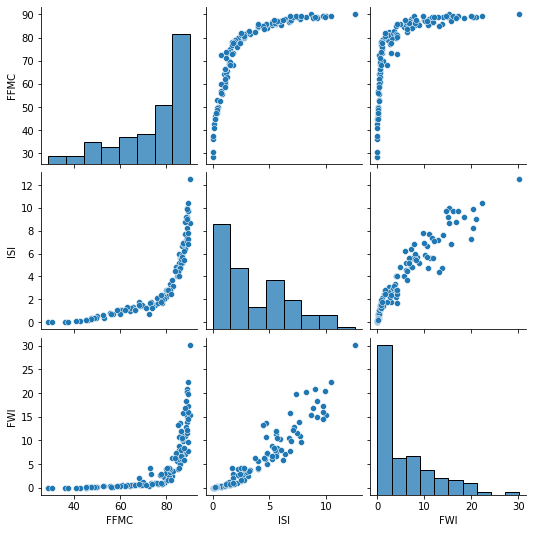

In [48]:
#linear relationship plot
df_l = df_raw[['FFMC', 'ISI', 'FWI']]
sns.pairplot(df_l)

In [53]:
#final model: y=FWI x=ISI
xf1 = df_raw[['ISI']]
y = df_raw['FWI']

xf1 = sm.add_constant(xf1)
lmodel_f1 = sm.OLS(y, xf1).fit()
print(lmodel_f1.summary())

                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     983.5
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           1.18e-59
Time:                        01:43:15   Log-Likelihood:                -262.64
No. Observations:                 122   AIC:                             529.3
Df Residuals:                     120   BIC:                             534.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6667      0.299     -5.570      0.0

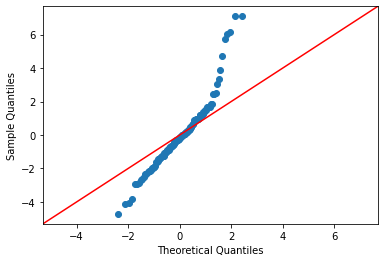

In [55]:
#QQ plot
import pylab

res = lmodel_f1.resid
sm.qqplot(res, line='45')
pylab.show()

In [59]:
import scipy.stats as stats
#normality test: jarque-bera
stats.jarque_bera(res)

Jarque_beraResult(statistic=45.73425918921122, pvalue=1.172011376837645e-10)

In [60]:
#normality test: anderson-darling
stats.anderson(res, dist='norm')

AndersonResult(statistic=2.0822706434583296, critical_values=array([0.559, 0.636, 0.763, 0.89 , 1.059]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [62]:
#Homoscedasticity Test

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(res, lmodel_f1.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 25.754967035500254),
 ('p-value', 3.876281274008434e-07),
 ('f-value', 32.111745916280235),
 ('f p-value', 1.0183064703955298e-07)]

eval_env: 1


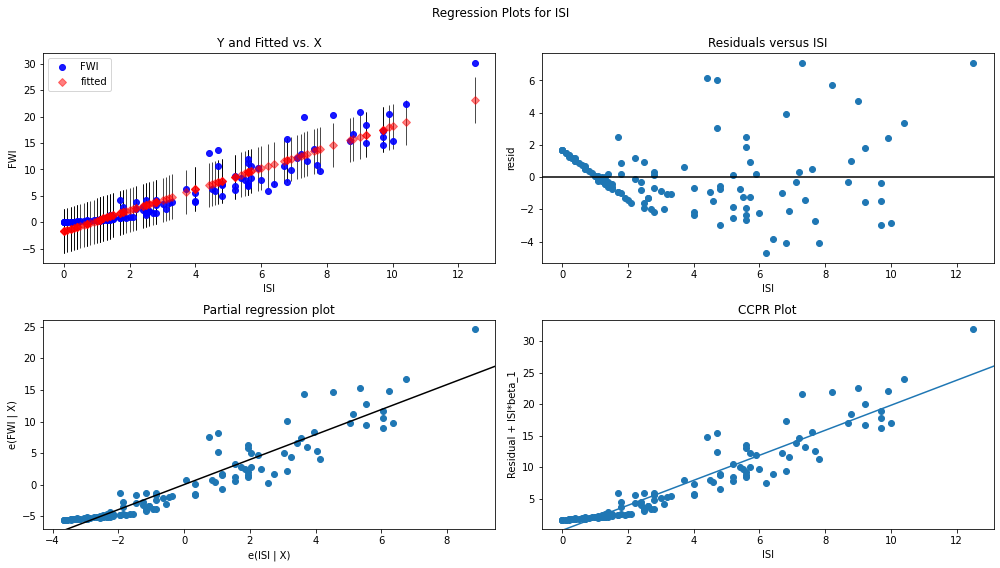

In [65]:
# Residual Plot

# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(lmodel_f1,
                                    'ISI',
                                    fig=fig)

In [66]:
#model with White-Huber-Eicker standard errors

lmodel_f2 = sm.OLS(y, xf1).fit(cov_type='HC1')
print(lmodel_f2.summary())

                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     502.6
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           1.02e-44
Time:                        13:43:42   Log-Likelihood:                -262.64
No. Observations:                 122   AIC:                             529.3
Df Residuals:                     120   BIC:                             534.9
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6667      0.240     -6.934      0.0

In [97]:
#cross validation
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score,KFold

lreg=LinearRegression()
kf=KFold(n_splits=10)
score=cross_val_score(lreg,xf1,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.69712464 0.8659591  0.89964332 0.8618559  0.86798148 0.83141521
 0.67954011 0.79168877 0.30848892 0.73653294]
Average Cross Validation score :0.7540230378227354
